## **测试 Simulation Test**

In [ ]:
# Implemented observation spaces for deep reinforcement learning: 
#   "DEFAULT":    motor angles and velocities, body orientation
#   "LR_COURSE_OBS":  [#0000FF TODO: what should you include? what is reasonable to measure on the real system? CPG states?] 

# Tasks to be learned with reinforcement learning
#     - "FWD_LOCOMOTION"
#         reward forward progress only
#     - "FLAGRUN"
#         move to goal, once reached, a new goal is randomly selected.
#     - "LR_COURSE_TASK" 
#         [#0000FF TODO: what should you train for?]
#         Ideally we want to command A1 to run in any direction while expending minimal energy
#         How will you construct your reward function? 

# Motor control modes:
#   - "TORQUE": 
#         supply raw torques to each motor (12)
#   - "PD": 
#         supply desired joint positions to each motor (12)
#         torques are computed based on the joint position/velocity error
#   - "CARTESIAN_PD": 
#         supply desired foot positions for each leg (12)
#         torques are computed based on the foot position/velocity error
#   - "CPG": 
#         supply desired CPG state modulations (8), mapped to foot positions
#         torques are computed based on inverse kinematics + joint PD (or you can add Cartesian PD)

# Terrain types:
#   -  None
#   - "SLOPES":
#   - "STAIRS":
#   - "GAPS":
#   - "RANDOM":

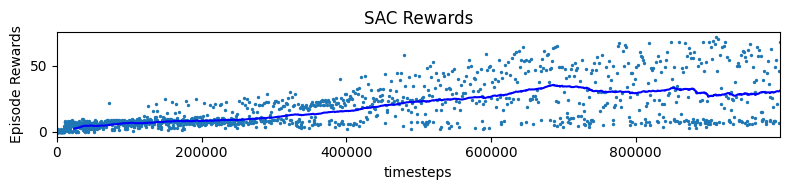

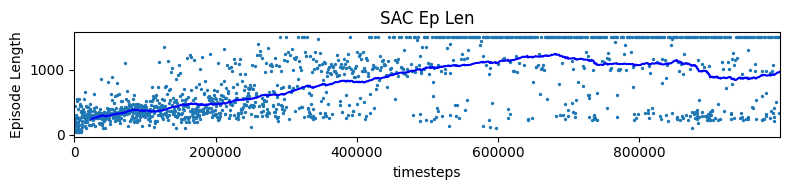

In [2]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings
test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/120524125617_cpg_SAC_SLOP_1000k_con_old")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "CPG", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = "SLOPES", #"RANDOM",  #None, 
                    add_noise              = False,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()      # run simulation

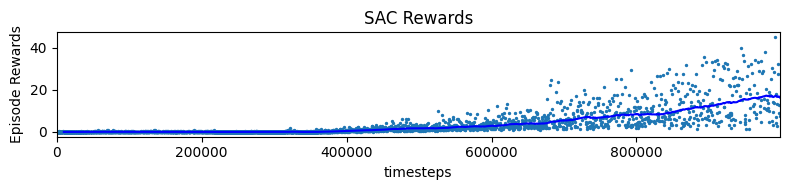

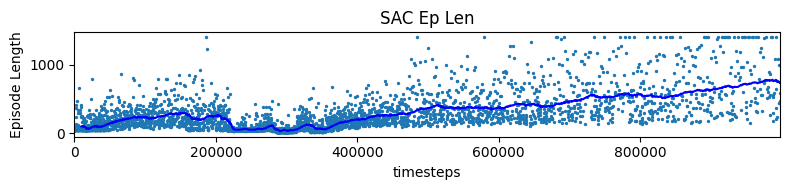

In [6]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings

test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/123124205607_diy_SAC_NoNoise_FLAT_new_Local")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "DIY", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None, #"SLOPES", #"RANDOM",  #None, 
                    add_noise              = False,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()    # run simulation


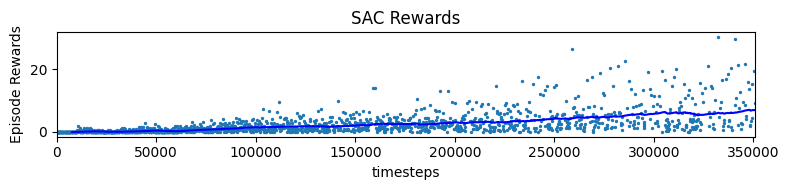

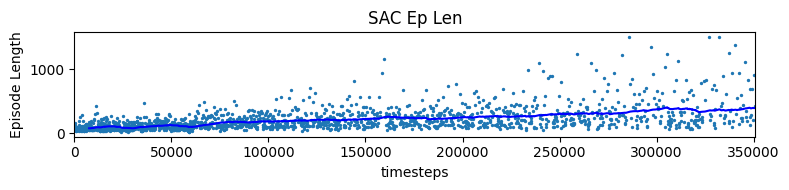

In [5]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings

test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/010125143419_diy_SAC_NoNoise_FLAT_con_Local")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "DIY", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None,  #"SLOPES", #"RANDOM",  #None, 
                    add_noise              = False, #True,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()      # run simulation


In [7]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings

test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/2501011544_diy_SAC_NoNoise_FLAT_CoLab_new")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "CPG", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None, #"SLOPES", #"RANDOM",  #None, 
                    add_noise              = False, #True,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()      # run simulation


IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 800x200 with 0 Axes>

In [13]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 2.1.1
